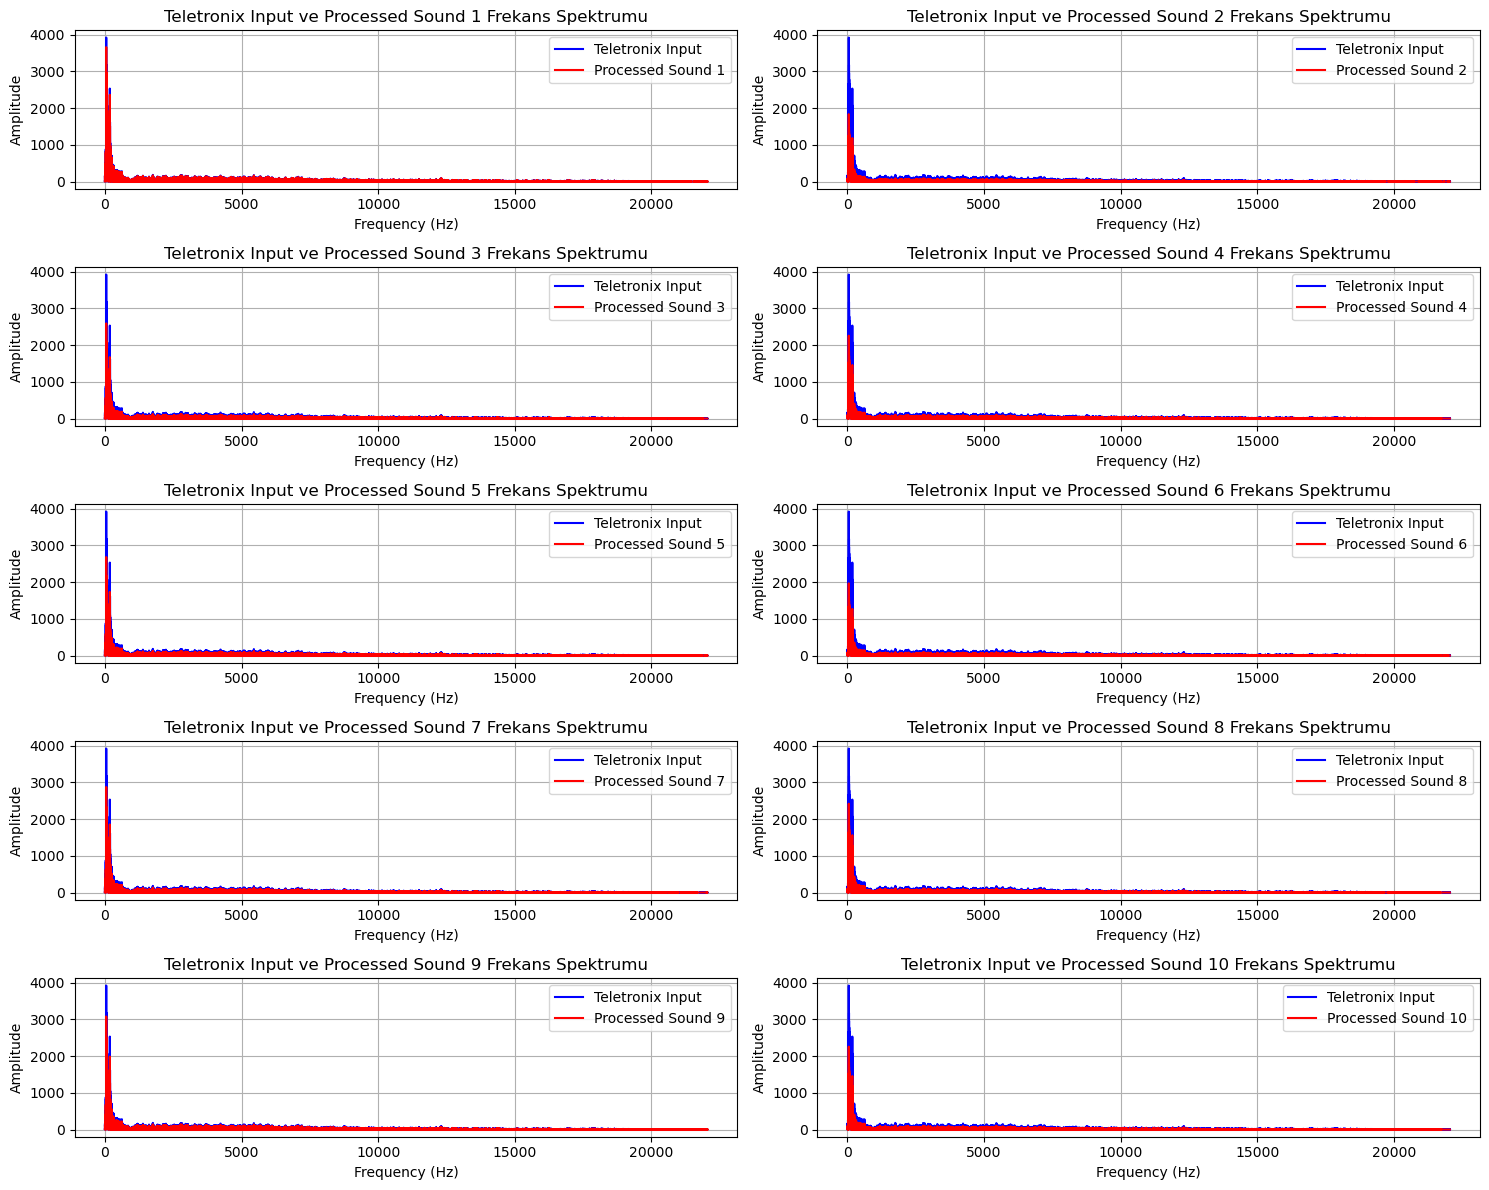

In [6]:
# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav",  
    "/Users/nazimerensahin/Desktop/fldr/22.wav",      
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# İlk ses dosyasını yükle
sound1_path = audio_files[0]
sound1_label = audio_labels[0]
sound1, sr1 = librosa.load(sound1_path, sr=None)

# Fourier Transform ve normalize işlemi
def compute_fft(signal, sr):
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft[:len(fft)//2])  # Pozitif frekanslar
    freqs = np.fft.fftfreq(len(fft), 1 / sr)[:len(fft)//2]
    return freqs, magnitude

# Sound1'in spektrumu
freqs1, magnitude1 = compute_fft(sound1, sr1)

# Grafik çizimi
plt.figure(figsize=(15, 12))

# Diğer ses dosyalarını sırayla karşılaştır
for i, (file_path, label) in enumerate(zip(audio_files[1:], audio_labels[1:]), 1):
    # Ses dosyasını yükle
    other_signal, sr_other = librosa.load(file_path, sr=None)
    
    # Spektrum hesaplama
    freqs_other, magnitude_other = compute_fft(other_signal, sr_other)
    
    # Grafik oluşturma
    plt.subplot(5, 2, i)  # 5 satır, 2 sütun düzen
    plt.plot(freqs1, magnitude1, label=sound1_label, color="blue")
    plt.plot(freqs_other, magnitude_other, label=label, color="red")
    plt.title(f"{sound1_label} ve {label} Frekans Spektrumu") # Alt grafik için başlık ekler.
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()